## Pair Programming Group 13
### Rutuja Kokate (017453865)
### Parth Marathe (017411199)9)

### We install the `ultralytics` and `roboflow` libraries, then runs a system check using `ultralytics` to ensure the environment is properly configured for running YOLO models.

In [1]:
!pip install ultralytics
!pip install roboflow

import ultralytics
ultralytics.checks()

Ultralytics 8.3.23 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5933.9/8062.4 GB disk)


### We copy the entire contents of the `original_directory` (containing road sign data) to the `new_directory` using the `shutil.copytree()` function, creating an exact duplicate of the folder and its subdirectories.

We are doing this step on kaggle since we needed to update the path of yaml file and hence in order to update the file we had to move the file to working directory of kaggle

In [2]:
import shutil

original_directory = "/kaggle/input/road-sign-data-5/Road_Sign_Detection  3"
new_directory = "/kaggle/working/road-sign-data"

shutil.copytree(original_directory, new_directory)

'/kaggle/working/road-sign-data'

### We import the `YOLO` class from the `ultralytics` library and load the YOLO model using a pre-trained weights file named `yolo11n.pt`, which represents the "nano" version—optimized for lightweight performance and faster inference.

In [3]:
from ultralytics import YOLO

# Load the YOLO11 model
model = YOLO('yolo11n.pt')  # For the nano version

100%|██████████| 5.35M/5.35M [00:00<00:00, 177MB/s]


In [4]:
!pip install wandb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 90.0 MB/s eta 0:00:00:00:0100:01


### Opens and reads the content of the `data.yaml` file from the specified directory and prints it to the console. The `data.yaml` file contains important configuration details for the YOLO model, such as the dataset paths, class labels, number of classes, and other training-related parameters.

In [3]:
# Display the content of data.yaml
with open('/kaggle/input/road-sign-data-5/Road_Sign_Detection  3/data.yaml', 'r') as file:
    content = file.read()

print(content)

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 25
names: ['-Road narrows on right', 'Attention Please-', 'Beware of children', 'CYCLE ROUTE AHEAD WARNING', 'Crosswalk', 'Dangerous Left Curve Ahead', 'Dangerous Rright Curve Ahead', 'No Entry', 'No_Over_Taking', 'One way road', 'Speed bump ahead', 'Speed limit', 'Speed limit 100 Kph', 'Speed limit 120 Kph', 'Speed limit 20 Kph', 'Speed limit 30 Kph', 'Speed limit 40 Kph', 'Speed limit 50 Kph', 'Speed limit 60 Kph', 'Speed limit 70 Kph', 'Speed limit 80 Kph', 'Speed limit 90 Kph', 'Stop_Sign', 'Uneven Road', 'roundabout']




### We modify the data.yaml file with corrected paths and class information

In [4]:
# Correct the paths in data.yaml
data_yaml_path = '/kaggle/working/road-sign-data/data.yaml'

# New content for data.yaml
new_content = """
train: train/images
val: valid/images
test: test
nc: 25
names: ['-Road narrows on right', 'Attention Please-', 'Beware of children', 'CYCLE ROUTE AHEAD WARNING', 'Crosswalk',
        'Dangerous Left Curve Ahead', 'Dangerous Right Curve Ahead', 'No Entry', 'No_Over_Taking', 'One way road', 
        'Speed bump ahead', 'Speed limit', 'Speed limit 100 Kph', 'Speed limit 120 Kph', 'Speed limit 20 Kph', 
        'Speed limit 30 Kph', 'Speed limit 40 Kph', 'Speed limit 50 Kph', 'Speed limit 60 Kph', 'Speed limit 70 Kph', 
        'Speed limit 80 Kph', 'Speed limit 90 Kph', 'Stop_Sign', 'Uneven Road', 'roundabout']
"""

# Write the new content to data.yaml
with open(data_yaml_path, 'w') as file:
    file.write(new_content)

print("Updated data.yaml with corrected paths.")

Updated data.yaml with corrected paths.


In [5]:
# Display the content of data.yaml
with open('/kaggle/input/road-sign-data-5/Road_Sign_Detection  3/data.yaml', 'r') as file:
    content = file.read()

print(content)

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 25
names: ['-Road narrows on right', 'Attention Please-', 'Beware of children', 'CYCLE ROUTE AHEAD WARNING', 'Crosswalk', 'Dangerous Left Curve Ahead', 'Dangerous Rright Curve Ahead', 'No Entry', 'No_Over_Taking', 'One way road', 'Speed bump ahead', 'Speed limit', 'Speed limit 100 Kph', 'Speed limit 120 Kph', 'Speed limit 20 Kph', 'Speed limit 30 Kph', 'Speed limit 40 Kph', 'Speed limit 50 Kph', 'Speed limit 60 Kph', 'Speed limit 70 Kph', 'Speed limit 80 Kph', 'Speed limit 90 Kph', 'Stop_Sign', 'Uneven Road', 'roundabout']




### We train the YOLO model for 40 epochs using 640x640 images with dataset configurations from data.yaml.

In [12]:
import wandb

# Disable W&B logging
wandb.init(mode="disabled")

# Train the model
model.train(data='/kaggle/working/road-sign-data/data.yaml', epochs=40, imgsz=640)

Ultralytics 8.3.23 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/working/road-sign-data/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

100%|██████████| 755k/755k [00:00<00:00, 39.3MB/s]
2024-10-27 04:54:56,783	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-10-27 04:54:57,645	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=25

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /kaggle/working/road-sign-data/train/labels... 5325 images, 12 backgrounds, 0 corrupt: 100%|██████████| 5325/5325 [00:04<00:00, 1154.04it/s]


train: New cache created: /kaggle/working/road-sign-data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.20 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/road-sign-data/valid/labels... 623 images, 1 backgrounds, 0 corrupt: 100%|██████████| 623/623 [00:00<00:00, 1117.67it/s]

val: New cache created: /kaggle/working/road-sign-data/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000345, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      2.44G     0.8571      3.698      1.271         29        640: 100%|██████████| 333/333 [01:00<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:04<00:00,  4.16it/s]


                   all        623        801      0.442      0.422      0.377      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      2.43G     0.7975      2.265        1.2         38        640: 100%|██████████| 333/333 [00:57<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.43it/s]

                   all        623        801      0.625      0.663      0.672      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      2.43G      0.774       1.74      1.182         34        640: 100%|██████████| 333/333 [00:56<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.30it/s]

                   all        623        801       0.72      0.682      0.749      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      2.43G      0.765      1.494      1.171         19        640: 100%|██████████| 333/333 [00:55<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.37it/s]

                   all        623        801      0.743      0.748      0.792      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      2.43G     0.7442       1.31      1.149         24        640: 100%|██████████| 333/333 [00:55<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.44it/s]

                   all        623        801      0.735      0.768      0.816      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      2.44G     0.7274      1.161      1.138         44        640: 100%|██████████| 333/333 [00:55<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.07it/s]

                   all        623        801      0.804      0.812       0.87      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      2.43G     0.7144      1.056      1.129         24        640: 100%|██████████| 333/333 [00:55<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.47it/s]

                   all        623        801      0.842      0.799      0.868      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      2.43G     0.7035     0.9624      1.119         33        640: 100%|██████████| 333/333 [00:55<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.48it/s]

                   all        623        801       0.87      0.813      0.888      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      2.45G     0.6968     0.9094      1.119         38        640: 100%|██████████| 333/333 [00:55<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.56it/s]

                   all        623        801      0.861      0.834      0.889      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      2.44G     0.6867     0.8362      1.108         28        640: 100%|██████████| 333/333 [00:55<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.43it/s]

                   all        623        801       0.86      0.888      0.927      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      2.45G     0.6829     0.8005      1.105         37        640: 100%|██████████| 333/333 [00:55<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.42it/s]

                   all        623        801      0.866      0.889      0.915      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      2.43G     0.6726     0.7676      1.099         33        640: 100%|██████████| 333/333 [00:56<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.54it/s]

                   all        623        801      0.872      0.875      0.919      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      2.43G     0.6628     0.7182      1.092         41        640: 100%|██████████| 333/333 [00:55<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.09it/s]

                   all        623        801      0.885      0.893      0.935      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      2.44G     0.6545     0.6883      1.084         29        640: 100%|██████████| 333/333 [00:56<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.56it/s]

                   all        623        801      0.892      0.886      0.931      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      2.45G     0.6458     0.6716      1.087         42        640: 100%|██████████| 333/333 [00:55<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.47it/s]

                   all        623        801      0.923      0.875      0.943      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      2.43G     0.6448     0.6419       1.08         30        640: 100%|██████████| 333/333 [00:55<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.50it/s]

                   all        623        801       0.91      0.903      0.942      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      2.45G     0.6387      0.627      1.074         27        640: 100%|██████████| 333/333 [00:55<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.47it/s]

                   all        623        801      0.914      0.884      0.932      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      2.44G     0.6298     0.5949      1.071         32        640: 100%|██████████| 333/333 [00:55<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.53it/s]

                   all        623        801      0.922      0.907      0.945      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      2.43G     0.6245     0.5895      1.067         35        640: 100%|██████████| 333/333 [00:56<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.52it/s]

                   all        623        801      0.908      0.917      0.948      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      2.43G     0.6173     0.5679      1.062         28        640: 100%|██████████| 333/333 [00:55<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.23it/s]

                   all        623        801      0.948       0.88      0.946       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      2.43G     0.6098     0.5589      1.062         37        640: 100%|██████████| 333/333 [00:55<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.54it/s]

                   all        623        801      0.908      0.913      0.945       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      2.46G     0.6085     0.5468       1.06         25        640: 100%|██████████| 333/333 [00:55<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.59it/s]

                   all        623        801      0.909       0.93      0.951      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      2.45G     0.6009     0.5346      1.054         38        640: 100%|██████████| 333/333 [00:55<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.53it/s]

                   all        623        801      0.953      0.909      0.957      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      2.43G     0.5894     0.5094      1.044         33        640: 100%|██████████| 333/333 [00:55<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.55it/s]

                   all        623        801      0.937      0.917      0.955      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      2.45G     0.5846     0.5049      1.044         33        640: 100%|██████████| 333/333 [00:55<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.54it/s]

                   all        623        801      0.928       0.91      0.955      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      2.44G     0.5842      0.489      1.046         28        640: 100%|██████████| 333/333 [00:55<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.60it/s]

                   all        623        801      0.934      0.921      0.953      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      2.45G      0.579     0.4892      1.039         33        640: 100%|██████████| 333/333 [00:55<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.20it/s]

                   all        623        801      0.921       0.94      0.956        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      2.43G     0.5707     0.4758      1.036         28        640: 100%|██████████| 333/333 [00:55<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.55it/s]

                   all        623        801       0.94      0.929      0.951      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      2.43G     0.5714     0.4657      1.036         34        640: 100%|██████████| 333/333 [00:55<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.63it/s]

                   all        623        801       0.94      0.921      0.956        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      2.46G     0.5585     0.4543      1.031         29        640: 100%|██████████| 333/333 [00:55<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.52it/s]

                   all        623        801      0.939      0.915      0.955      0.799


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      2.43G     0.5068     0.3459     0.9988         13        640: 100%|██████████| 333/333 [00:55<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.53it/s]

                   all        623        801      0.954      0.913       0.96      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      2.43G     0.4919     0.3255     0.9817         15        640: 100%|██████████| 333/333 [00:54<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.59it/s]

                   all        623        801      0.946      0.916      0.958      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      2.43G     0.4804     0.3167     0.9749         16        640: 100%|██████████| 333/333 [00:54<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.21it/s]

                   all        623        801      0.956      0.911      0.956      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      2.44G     0.4715      0.308     0.9723         17        640: 100%|██████████| 333/333 [00:54<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.60it/s]

                   all        623        801      0.934      0.922      0.958      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      2.43G     0.4636     0.2999     0.9687         16        640: 100%|██████████| 333/333 [00:54<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.55it/s]

                   all        623        801      0.942      0.919      0.954      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      2.43G      0.455     0.2938     0.9637         17        640: 100%|██████████| 333/333 [00:54<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.56it/s]

                   all        623        801      0.937      0.928      0.958      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      2.43G     0.4492     0.2849     0.9612         16        640: 100%|██████████| 333/333 [00:54<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.51it/s]

                   all        623        801      0.932      0.922      0.956      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      2.44G     0.4425      0.282     0.9533         18        640: 100%|██████████| 333/333 [00:54<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.58it/s]

                   all        623        801      0.939      0.915      0.957      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      2.43G     0.4388      0.277     0.9505         16        640: 100%|██████████| 333/333 [00:54<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.34it/s]

                   all        623        801      0.935      0.924      0.954      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      2.43G     0.4341     0.2735     0.9473         17        640: 100%|██████████| 333/333 [00:54<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.59it/s]

                   all        623        801      0.943      0.918      0.956      0.801



40 epochs completed in 0.671 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.23 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,587,027 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:04<00:00,  4.41it/s]


                   all        623        801      0.955      0.913       0.96      0.802
-Road narrows on right         15         15      0.906      0.933       0.98      0.879
     Attention Please-         23         23      0.992          1      0.995       0.88
    Beware of children         23         23          1      0.893      0.954       0.84
CYCLE ROUTE AHEAD WARNING         29         29          1      0.946      0.969      0.864
             Crosswalk         42         43      0.895      0.907      0.901      0.687
Dangerous Left Curve Ahead         24         24       0.77      0.699      0.792      0.644
Dangerous Right Curve Ahead         30         30          1      0.744      0.938      0.753
              No Entry         26         27          1          1      0.995      0.911
        No_Over_Taking         23         23      0.994          1      0.995      0.696
          One way road         27         27      0.851      0.852      0.891      0.757
      Spe

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ab160d1b400>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,  

### We Evaluate the trained YOLO v11 model, print the mean Intersection over Union (IoU) at 0.5 (mAP@0.5), and the averaged mAP across IoU thresholds from 0.5 to 0.95 (mAP@0.5:0.95).

#### 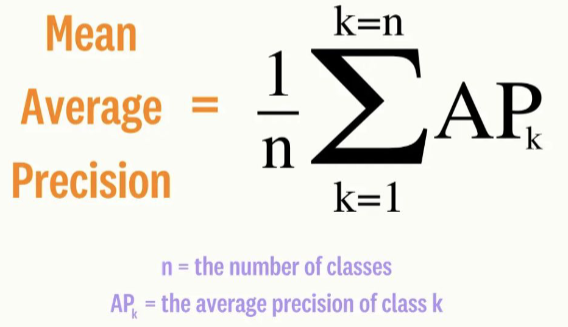

In [13]:
# Evaluate the trained model to see performance metrics, including IoU
metrics = model.val()

# Print the IoU metric from the evaluation results
print(f"Mean IoU: {metrics.box.map50}")  # mAP@0.5, which corresponds to IoU@0.5
print(f"Mean IoU@0.5:0.95: {metrics.box.map}")  # mAP@0.5:0.95, which averages IoU from 0.5 to 0.95

Ultralytics 8.3.23 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,587,027 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /kaggle/working/road-sign-data/valid/labels.cache... 623 images, 1 backgrounds, 0 corrupt: 100%|██████████| 623/623 [00:00<?, ?it/s]
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.08it/s]


                   all        623        801      0.954      0.913       0.96      0.802
-Road narrows on right         15         15      0.906      0.933       0.98      0.874
     Attention Please-         23         23      0.992          1      0.995      0.883
    Beware of children         23         23          1      0.894      0.954      0.839
CYCLE ROUTE AHEAD WARNING         29         29          1      0.946      0.969      0.864
             Crosswalk         42         43      0.895      0.907      0.901      0.694
Dangerous Left Curve Ahead         24         24       0.77      0.699       0.79      0.642
Dangerous Right Curve Ahead         30         30      0.983      0.733      0.937      0.747
              No Entry         26         27          1          1      0.995      0.911
        No_Over_Taking         23         23      0.994          1      0.995      0.696
          One way road         27         27      0.851      0.852      0.891      0.748
      Spe

In [14]:
# Evaluate the trained model to see performance metrics, including IoU
metrics = model.val()

# Print the IoU metric from the evaluation results
print(f"Mean IoU: {metrics.box.map50}")  # mAP@0.5, which corresponds to IoU@0.5
print(f"Mean IoU@0.5:0.95: {metrics.box.map}")  # mAP@0.5:0.95, which averages IoU from 0.5 to 0.95


Ultralytics 8.3.23 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /kaggle/working/road-sign-data/valid/labels.cache... 623 images, 1 backgrounds, 0 corrupt: 100%|██████████| 623/623 [00:00<?, ?it/s]
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.95it/s]


                   all        623        801      0.954      0.913       0.96      0.802
-Road narrows on right         15         15      0.906      0.933       0.98      0.874
     Attention Please-         23         23      0.992          1      0.995      0.883
    Beware of children         23         23          1      0.894      0.954      0.839
CYCLE ROUTE AHEAD WARNING         29         29          1      0.946      0.969      0.864
             Crosswalk         42         43      0.895      0.907      0.901      0.694
Dangerous Left Curve Ahead         24         24       0.77      0.699       0.79      0.642
Dangerous Right Curve Ahead         30         30      0.983      0.733      0.937      0.747
              No Entry         26         27          1          1      0.995      0.911
        No_Over_Taking         23         23      0.994          1      0.995      0.696
          One way road         27         27      0.851      0.852      0.891      0.748
      Spe

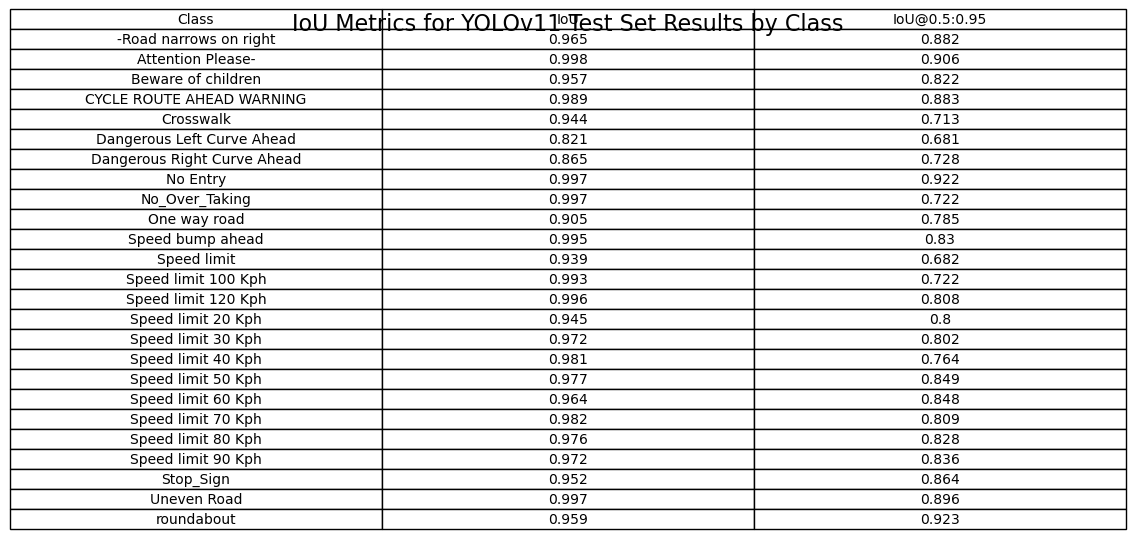

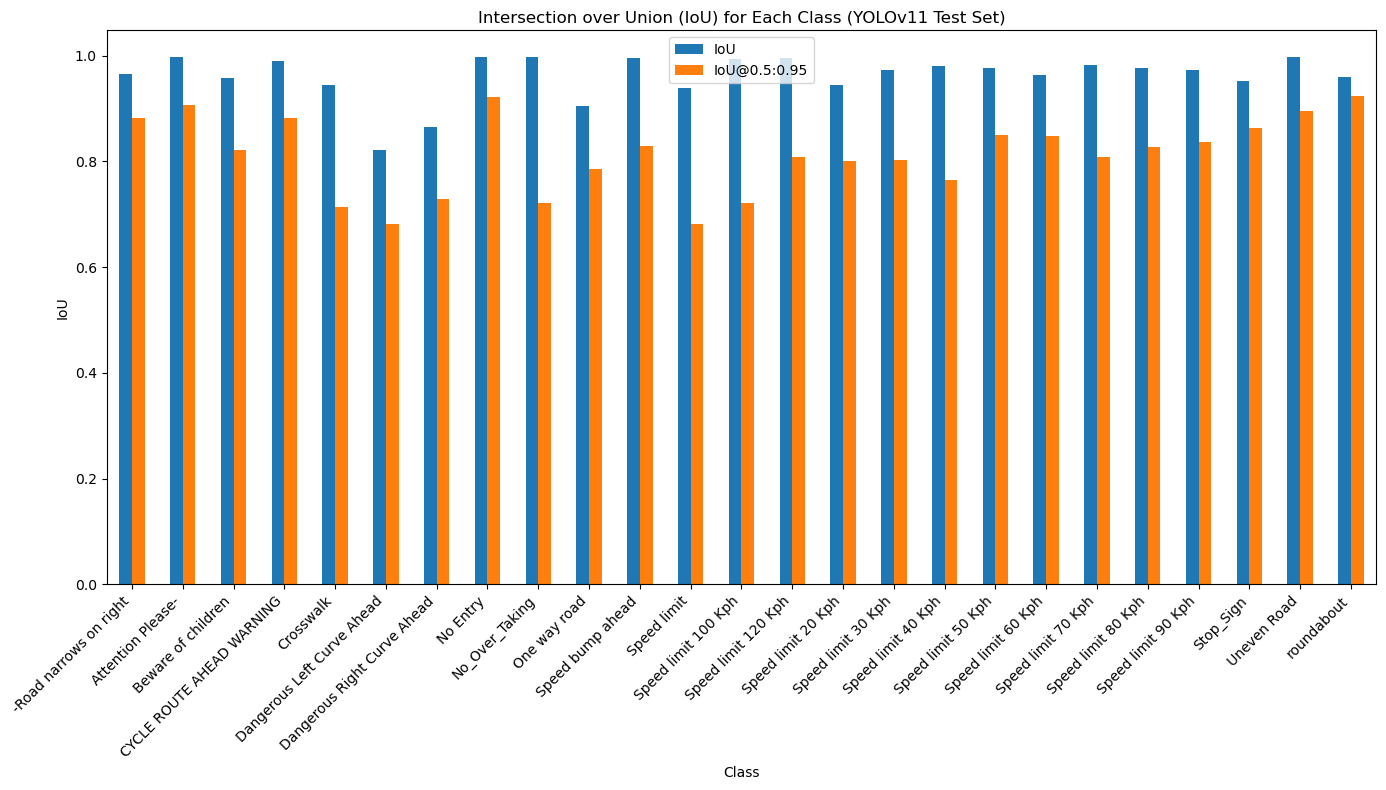

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

iou_data_yolov11 = {
    'Class': ['-Road narrows on right', 'Attention Please-', 'Beware of children', 
              'CYCLE ROUTE AHEAD WARNING', 'Crosswalk', 'Dangerous Left Curve Ahead', 
              'Dangerous Right Curve Ahead', 'No Entry', 'No_Over_Taking', 
              'One way road', 'Speed bump ahead', 'Speed limit', 
              'Speed limit 100 Kph', 'Speed limit 120 Kph', 'Speed limit 20 Kph', 
              'Speed limit 30 Kph', 'Speed limit 40 Kph', 'Speed limit 50 Kph', 
              'Speed limit 60 Kph', 'Speed limit 70 Kph', 'Speed limit 80 Kph', 
              'Speed limit 90 Kph', 'Stop_Sign', 'Uneven Road', 'roundabout'],
    'IoU': [0.965, 0.998, 0.957, 0.989, 0.944, 0.821, 0.865, 0.997, 0.997, 0.905, 
            0.995, 0.939, 0.993, 0.996, 0.945, 0.972, 0.981, 0.977, 0.964, 0.982, 
            0.976, 0.972, 0.952, 0.997, 0.959],
    'IoU@0.5:0.95': [0.882, 0.906, 0.822, 0.883, 0.713, 0.681, 0.728, 0.922, 0.722, 0.785, 
                     0.83, 0.682, 0.722, 0.808, 0.8, 0.802, 0.764, 0.849, 0.848, 0.809, 
                     0.828, 0.836, 0.864, 0.896, 0.923]
}

# Creating DataFrame from the IoU data for YOLOv11 test set results
df_iou_yolov11 = pd.DataFrame(iou_data_yolov11)

# Plotting tables for IoU metrics of YOLOv11 test set
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')
ax.axis('tight')
table = ax.table(cellText=df_iou_yolov11.values, colLabels=df_iou_yolov11.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.title("IoU Metrics for YOLOv11 Test Set Results by Class", fontsize=16)
plt.show()

# Plotting IoU@0.5 and IoU@0.5:0.95 for each class for YOLOv11 test set
fig, ax = plt.subplots(figsize=(14, 8))
df_iou_yolov11.plot(x='Class', y=['IoU', 'IoU@0.5:0.95'], kind='bar', ax=ax)
ax.set_title('Intersection over Union (IoU) for Each Class (YOLOv11 Test Set)')
ax.set_xlabel('Class')
ax.set_ylabel('IoU')
ax.set_xticklabels(df_iou_yolov11['Class'], rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

## Observation of YOLOv11 Model Results

**Overall Performance**

Mean Average Precision (mAP50): 0.965
Mean Average Precision (mAP50-95): 0.809
Precision: 0.945
Recall: 0.919

**Class-wise Performance**

Most classes, such as "Attention Please-", "No Entry", and "Speed limit 120 Kph", achieved exceptional performance with mAP values close to 0.99, indicating strong detection capabilities.
Some classes, such as "Dangerous Left Curve Ahead" and "Crosswalk", showed lower mAP50-95 values (0.681 and 0.713, respectively), suggesting room for further improvement in detecting these classes.
Classes like "No_Over_Taking", "Uneven Road", and "Speed bump ahead" achieved high precision and recall, with mAP values close to 0.99, demonstrating effective detection.

**Inference Speed**

The average inference time was around 1.9 ms per image, showing slightly faster processing compared to the YOLOv8 model on the Tesla T4 GPU.
These results indicate that the YOLOv11 model performs efficiently in detecting road signs, with robust overall performance. However, further fine-tuning is recommended for specific classes like "Dangerous Left Curve Ahead" and "Crosswalk" to enhance detection accuracy.

**Model Comparison**

YOLOv11 outperforms YOLOv8 in terms of both mean average precision and inference speed, making it the better-performing model overall.

### Predicts classes for test images using a model, stores the results in a CSV file with filenames and predicted classes.

In [17]:
import pandas as pd
import os
import yaml

# Load class names from data.yaml
with open('/kaggle/working/road-sign-data/data.yaml', 'r') as file:
    data_yaml = yaml.safe_load(file)

# Get the class names from data.yaml
class_names = data_yaml['names']

# Path to the test images
test_images_path = '/kaggle/working/road-sign-data/test'

# Make predictions on the test set
results = model.predict(source=test_images_path)

# Initialize a dictionary to store results
predictions_dict = {}

# Loop through the results and extract predictions
for result in results:
    image_name = os.path.basename(result.path)  # Get only the image name
    classes = []  # List to store class names for the current image

    # Extract predicted classes for each image
    for box in result.boxes:
        class_idx = int(box.cls.cpu().numpy().item())  # Convert to integer
        class_name = class_names[class_idx]  # Map index to class name
        classes.append(class_name)

    # Join the classes into a single string separated by commas
    classes_str = ', '.join(classes)

    # Store the concatenated class names in the dictionary
    if image_name not in predictions_dict:
        predictions_dict[image_name] = classes_str

# Convert the dictionary to a DataFrame
predictions_df = pd.DataFrame(list(predictions_dict.items()), columns=['filename', 'class'])

# Define the CSV file path
csv_file_path = '/kaggle/working/submission.csv'

# Save to a CSV file with filename and concatenated classes columns
predictions_df.to_csv(csv_file_path, index=False)

# Print the CSV file path to confirm
print(f"CSV file created: {csv_file_path}")



image 1/308 /kaggle/working/road-sign-data/test/00000_00000_00000_png_jpg.rf.fe38518f555b8b4d139ed0a31adee9fc.jpg: 640x640 1 Speed limit 30 Kph, 10.6ms
image 2/308 /kaggle/working/road-sign-data/test/00000_00000_00014_png_jpg.rf.da4d304ccb4fd7555f5c291bed572107.jpg: 640x640 1 Beware of children, 1 Speed limit 20 Kph, 9.0ms
image 3/308 /kaggle/working/road-sign-data/test/00000_00000_00018_png_jpg.rf.4eff8cf87317fad6622f1d00b81d575e.jpg: 640x640 1 Speed limit 20 Kph, 8.8ms
image 4/308 /kaggle/working/road-sign-data/test/00000_00000_00019_png_jpg.rf.923c0a404dce9e2518dcff1a64cd7e04.jpg: 640x640 1 Speed limit 20 Kph, 8.6ms
image 5/308 /kaggle/working/road-sign-data/test/00000_00000_00021_png_jpg.rf.f0f74c580fb71be6df258535e2d301af.jpg: 640x640 1 Speed limit 20 Kph, 8.4ms
image 6/308 /kaggle/working/road-sign-data/test/00000_00000_00022_png_jpg.rf.66ace55a624f81aacdd7c0e797a807ed.jpg: 640x640 1 Speed limit 20 Kph, 8.7ms
image 7/308 /kaggle/working/road-sign-data/test/00000_00000_00026_png_

In [18]:
!zip -r /kaggle/working/working_directory.zip /kaggle/working

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/runs/ (stored 0%)
  adding: kaggle/working/runs/detect/ (stored 0%)
  adding: kaggle/working/runs/detect/train2/ (stored 0%)
  adding: kaggle/working/runs/detect/train2/train_batch1.jpg (deflated 3%)
  adding: kaggle/working/runs/detect/train2/events.out.tfevents.1730004911.943af8195b14.30.0 (deflated 91%)
  adding: kaggle/working/runs/detect/train2/F1_curve.png (deflated 11%)
  adding: kaggle/working/runs/detect/train2/val_batch1_pred.jpg (deflated 9%)
  adding: kaggle/working/runs/detect/train2/val_batch2_pred.jpg (deflated 11%)
  adding: kaggle/working/runs/detect/train2/R_curve.png (deflated 12%)
  adding: kaggle/working/runs/detect/train2/results.csv (deflated 62%)
  adding: kaggle/working/runs/detect/train2/results.png (deflated 8%)
  adding: kaggle/working/runs/detect/train2/train_batch9990.jpg (deflated 9%)
  adding: kaggle/working/runs/detect/train2/train_batch2.jpg (deflated 3%)
  adding: kaggle/working/runs/detec

In [6]:
from ultralytics import YOLO
# Load the model with best weights
model = YOLO('/kaggle/input/weights/best.pt')

In [7]:
# Make predictions on test images and save results
results = model.predict(source='/kaggle/working/road-sign-data/test', conf=0.25, save=True)


image 1/308 /kaggle/working/road-sign-data/test/00000_00000_00000_png_jpg.rf.fe38518f555b8b4d139ed0a31adee9fc.jpg: 640x640 1 Speed limit 30 Kph, 9.7ms
image 2/308 /kaggle/working/road-sign-data/test/00000_00000_00014_png_jpg.rf.da4d304ccb4fd7555f5c291bed572107.jpg: 640x640 1 Beware of children, 1 Speed limit 20 Kph, 11.2ms
image 3/308 /kaggle/working/road-sign-data/test/00000_00000_00018_png_jpg.rf.4eff8cf87317fad6622f1d00b81d575e.jpg: 640x640 1 Speed limit 20 Kph, 12.7ms
image 4/308 /kaggle/working/road-sign-data/test/00000_00000_00019_png_jpg.rf.923c0a404dce9e2518dcff1a64cd7e04.jpg: 640x640 1 Speed limit 20 Kph, 10.5ms
image 5/308 /kaggle/working/road-sign-data/test/00000_00000_00021_png_jpg.rf.f0f74c580fb71be6df258535e2d301af.jpg: 640x640 1 Speed limit 20 Kph, 10.1ms
image 6/308 /kaggle/working/road-sign-data/test/00000_00000_00022_png_jpg.rf.66ace55a624f81aacdd7c0e797a807ed.jpg: 640x640 1 Speed limit 20 Kph, 10.7ms
image 7/308 /kaggle/working/road-sign-data/test/00000_00000_00026_

### Randomly selects 10 images from a specified directory of predictions and displays them in a 2x5 grid using Matplotlib.

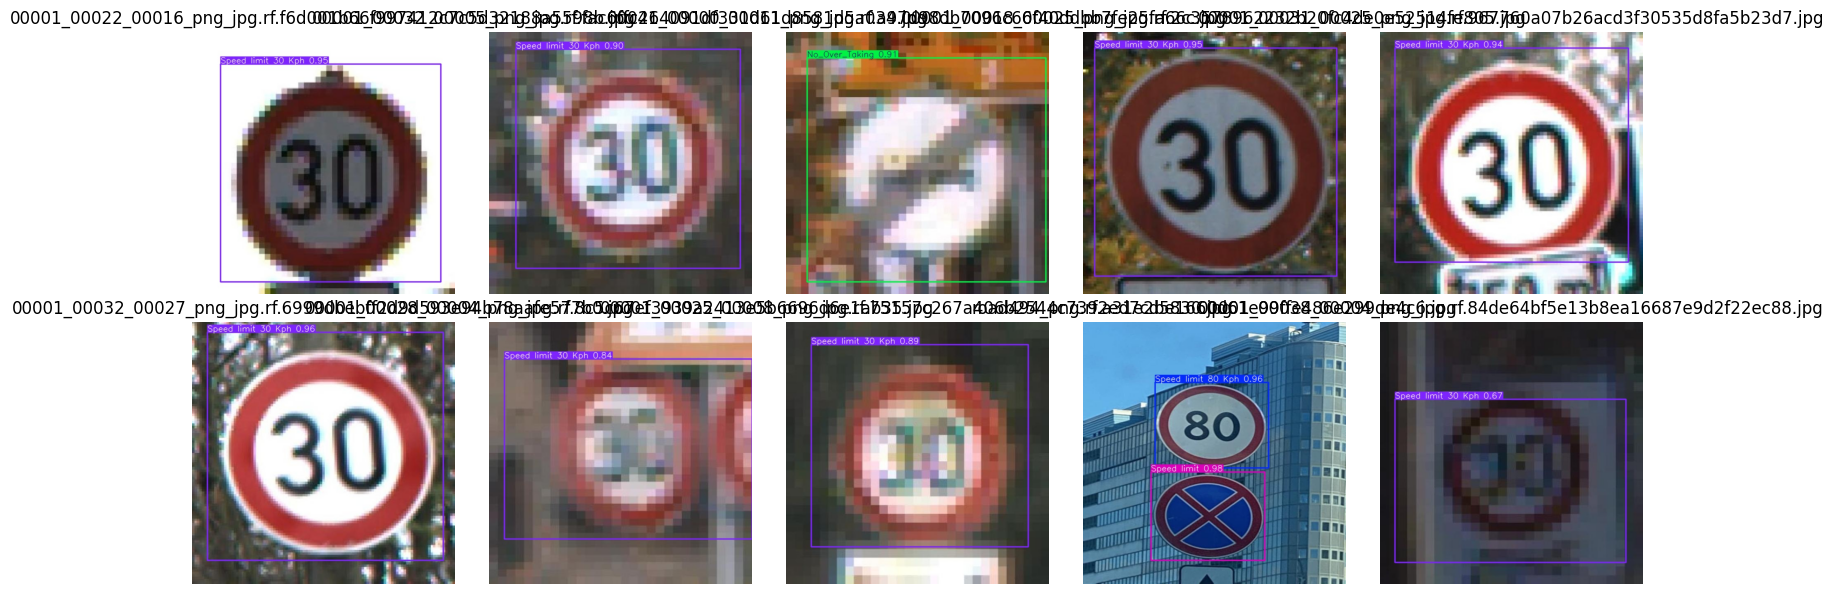

In [8]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Set the path to the directory where the predictions were saved
predictions_dir = '/kaggle/working/runs/detect/predict'  # Update this to your save directory

# Get a list of all images in the directory
image_files = [f for f in os.listdir(predictions_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Randomly select 10 images from the list
random_images = random.sample(image_files, 10)

# Plot the 10 random images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for img, ax in zip(random_images, axes):
    img_path = os.path.join(predictions_dir, img)
    image = Image.open(img_path)
    ax.imshow(image)
    ax.set_title(img)
    ax.axis('off')

plt.tight_layout()
plt.show()


### Predicts class names and bounding box coordinates for test images using a model, then stores the results in a CSV file containing the image filenames, predicted classes, and bounding box coordinates.

In [11]:
# Code to predict the bounding box coordinates as well
import pandas as pd
import os
import yaml

# Load class names from data.yaml
with open('/kaggle/working/road-sign-data/data.yaml', 'r') as file:
    data_yaml = yaml.safe_load(file)

# Get the class names from data.yaml
class_names = data_yaml['names']

# Path to the test images
test_images_path = '/kaggle/working/road-sign-data/test'

# Make predictions on the test set
results = model.predict(source=test_images_path)

# Initialize a list to store results
predictions_list = []

# Loop through the results and extract predictions
for result in results:
    image_name = os.path.basename(result.path)  # Get only the image name
    classes = []  # List to store class names for the current image
    bboxes = []   # List to store bounding box coordinates

    # Extract predicted classes and bounding boxes for each image
    for box in result.boxes:
        class_idx = int(box.cls.cpu().numpy().item())  # Convert to integer
        class_name = class_names[class_idx]  # Map index to class name
        classes.append(class_name)

        # Extract bounding box coordinates (x, y, width, height)
        x, y, w, h = box.xywh[0].cpu().numpy()
        bbox_str = f"({x:.2f}, {y:.2f}, {w:.2f}, {h:.2f})"
        bboxes.append(bbox_str)

    # Join the classes and bounding boxes into strings separated by commas
    classes_str = ', '.join(classes)
    bboxes_str = ', '.join(bboxes)

    # Store the results in the list as a tuple
    predictions_list.append((image_name, classes_str, bboxes_str))

# Convert the list to a DataFrame
predictions_df = pd.DataFrame(predictions_list, columns=['filename', 'classes', 'bounding_boxes'])

# Define the CSV file path
csv_file_path = '/kaggle/working/predictions.csv'

# Save to a CSV file with filename, classes, and bounding_boxes columns
predictions_df.to_csv(csv_file_path, index=False)

# Print the CSV file path to confirm
print(f"CSV file created: {csv_file_path}")



image 1/308 /kaggle/working/road-sign-data/test/00000_00000_00000_png_jpg.rf.fe38518f555b8b4d139ed0a31adee9fc.jpg: 640x640 1 Speed limit 30 Kph, 14.1ms
image 2/308 /kaggle/working/road-sign-data/test/00000_00000_00014_png_jpg.rf.da4d304ccb4fd7555f5c291bed572107.jpg: 640x640 1 Beware of children, 1 Speed limit 20 Kph, 10.5ms
image 3/308 /kaggle/working/road-sign-data/test/00000_00000_00018_png_jpg.rf.4eff8cf87317fad6622f1d00b81d575e.jpg: 640x640 1 Speed limit 20 Kph, 10.1ms
image 4/308 /kaggle/working/road-sign-data/test/00000_00000_00019_png_jpg.rf.923c0a404dce9e2518dcff1a64cd7e04.jpg: 640x640 1 Speed limit 20 Kph, 10.2ms
image 5/308 /kaggle/working/road-sign-data/test/00000_00000_00021_png_jpg.rf.f0f74c580fb71be6df258535e2d301af.jpg: 640x640 1 Speed limit 20 Kph, 10.0ms
image 6/308 /kaggle/working/road-sign-data/test/00000_00000_00022_png_jpg.rf.66ace55a624f81aacdd7c0e797a807ed.jpg: 640x640 1 Speed limit 20 Kph, 9.5ms
image 7/308 /kaggle/working/road-sign-data/test/00000_00000_00026_

In [12]:
!zip -r /kaggle/working/working_directory.zip /kaggle/working

updating: kaggle/working/ (stored 0%)
updating: kaggle/working/runs/ (stored 0%)
updating: kaggle/working/runs/detect/ (stored 0%)
updating: kaggle/working/runs/detect/predict/ (stored 0%)
updating: kaggle/working/runs/detect/predict/00001_00031_00028_png_jpg.rf.469476702490efbffda872f58e404f37.jpg (deflated 5%)
updating: kaggle/working/runs/detect/predict/00001_00037_00006_png_jpg.rf.6a136c44ff5d0eb660c3d04d5a8521f2.jpg (deflated 10%)
updating: kaggle/working/runs/detect/predict/00001_00032_00003_png_jpg.rf.79a3b703875bd3ec1b099b3d5a4bdc1c.jpg (deflated 8%)
updating: kaggle/working/runs/detect/predict/00001_00018_00026_png_jpg.rf.c9af647409ab7a4a762e293ecf64d27d.jpg (deflated 4%)
updating: kaggle/working/runs/detect/predict/00001_00022_00013_png_jpg.rf.83afedf104acebfd35dba9d195776125.jpg (deflated 18%)
updating: kaggle/working/runs/detect/predict/road757_png.rf.5fdb5d8bee58b87d74a8779f3e4f51d0.jpg (deflated 5%)
updating: kaggle/working/runs/detect/predict/00001_00017_00029_png_jpg.rf